In [1]:
import pandas as pd
import os
import numpy as np

cwd = os.getcwd()

In [2]:
df = pd.read_csv(cwd + "/KaggleV2-May-2016.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Check for any duplicates (across all columns) in the dataframe
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Data Cleaning

In [6]:
# rename columns
df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True)

In [7]:
# Change all columns to lowercase so it will be easier to edit
df.rename(columns=lambda x: x.lower(), inplace=True)

In [8]:
# Drop patient and appointment id columns
df.drop(columns=["patientid", "appointmentid"], inplace=True)

In [9]:
# Converting time related columns into datetime format
import datetime

df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"], format="%Y-%m-%d")

In [10]:
df["appointmentday"].head()

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: appointmentday, dtype: datetime64[ns, UTC]

#### Grouping

In [11]:
df.groupby(by="neighbourhood").sum(numeric_only=True)

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
neighbourhood,,,,,,,
AEROPORTO,425,0,2,0,0,0,1
ANDORINHAS,81672,323,586,299,52,91,567
ANTÔNIO HONÓRIO,9985,14,5,3,0,1,93
ARIOVALDO FAVALESSA,9263,52,37,19,14,11,57
BARRO VERMELHO,19052,0,57,23,2,6,143
...,...,...,...,...,...,...,...
SÃO JOSÉ,66454,180,513,238,82,79,669
SÃO PEDRO,88223,321,670,249,150,97,696
TABUAZEIRO,109512,537,712,240,57,85,959


#### Converting data into binary for predictions

In [12]:
# Select data that are objects
df.select_dtypes('object').columns

Index(['gender', 'neighbourhood', 'no-show'], dtype='object')

In [13]:
df_binary = df.copy()

df_binary["gender"] = df_binary["gender"].map({"F": 1, "M": 0})
df_binary["no-show"] = df_binary["no-show"].map({"Yes": 1, "No": 0})

In [14]:
# Calculate length of time between appointment day and scheduled day
df_binary["wait_time"] = (df_binary["appointmentday"] - df_binary["scheduledday"]).dt.days

#### Creating a prediction model

In [15]:
# Adding training variables to the model
training_vars = ['gender', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'wait_time']

In [16]:
from sklearn.model_selection import train_test_split

# Set the test size to 15%
train, test = train_test_split(df_binary, test_size=0.15)

In [17]:
f'training shape = {train.shape} & test shape = {test.shape}'

'training shape = (93947, 13) & test shape = (16580, 13)'

In [18]:
# Define 
train_x = train[training_vars]
train_y = train['no-show']

test_x = test[training_vars]
test_y = test['no-show']

In [19]:
# import neural network classifier
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(5,2))

In [20]:
model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(5, 2))

In [21]:
# Return predictions
prediction = model.predict_proba(test_x)
probability_predictions = prediction[:,1]

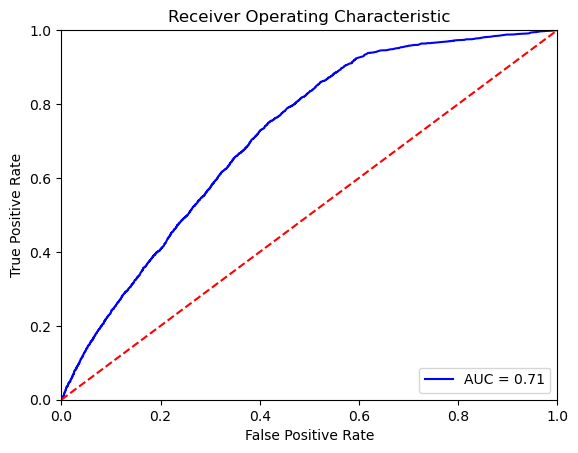

In [22]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(test_y, probability_predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Visualizations

Text(0.5, 1.0, 'Average of selected columns')

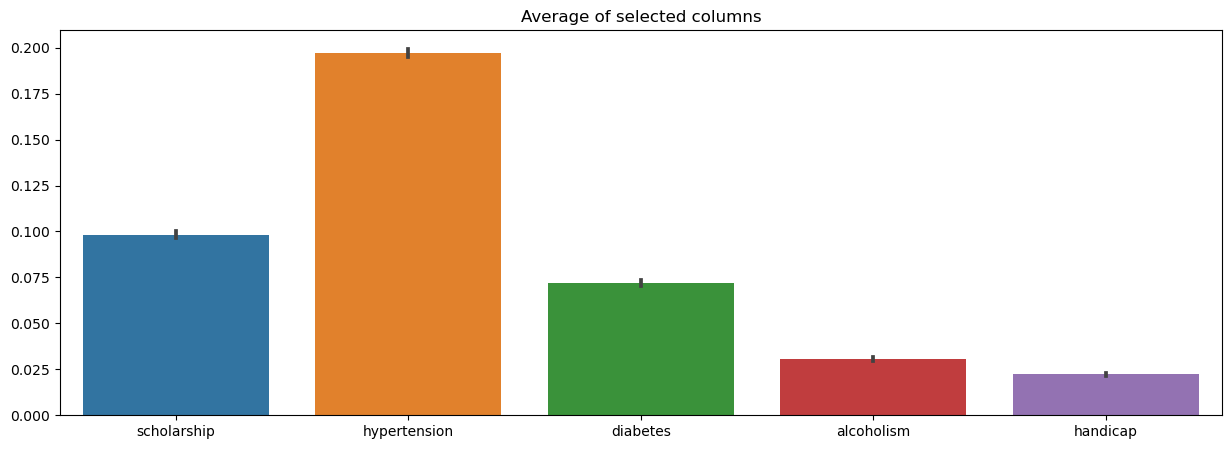

In [23]:
# Load visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the width and height of the figure
plt.figure(figsize=(15,5))

chart = ['scholarship','hypertension','diabetes','alcoholism','handicap']

sns.barplot(data=df[chart])
plt.title('Average of selected columns')